## Bengaluru House Price Predictive Model

mainly House rent depends on 5 factors:
1. location
2. sqft area
3. BHK
4. number of bath
5. Neighbourhood/society

In [1]:
# Import all the neccessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplot inline

import warnings 
warnings.filterwarnings("ignore")


from sklearn.metrics import r2_score, accuracy_score,mean_absolute_error,mean_squared_error



UsageError: Line magic function `%matplot` not found.


## Read the data from the csv file

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv",encoding="latin-1")
data.head()

# Replace 'latin-1' with the actual encoding of your file if it's different from UTF-8. 
# Specifying the correct encoding should help to read the file without encountering the UnicodeDecodeError.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


### Check the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


## Making the Dataset into correct format 

In [4]:
# availability feature overview
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
# convert the availability to datetime and extract the month 
data['Ready_not'] = pd.to_datetime(data['availability'],format="%d-%b",errors='coerce').dt.strftime('%b')

# if nan is there make it 'ready'
data['Availability'] = [r if pd.notna(r) else "available" for r in data['Ready_not']]

In [6]:
# size feature overview
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
# I would like to remove all the charcters and keep only numbers
# usualy in India 3BHK means 3bedroom, a hall and a kitchen  
# ie, number of BHK = number of bedroom

data['Bedrooms'] = data['size'].str.extract("(\d+)").astype(float)

<AxesSubplot:ylabel='Density'>

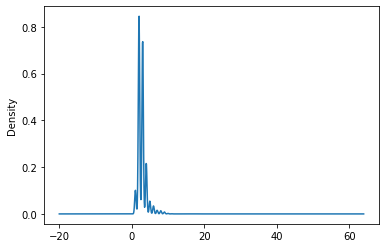

In [8]:
data.Bedrooms.plot.density()

In [9]:
# keep only numbers from total_sqft variable
data['Toal_sqft'] =  data.total_sqft.str.extract("(\d+)").astype(float)

In [10]:
# In this Dataset Price is target variable, let's clean it
# all the special char in price variable
print(data.price.str.extract("([^\w\s])").value_counts())

# keep only numbers
data['Price'] = data.price.str.extract("(\d+)").astype(float)
data.Price.value_counts()

.    2522
?     202
     110
$      23
-       2
dtype: int64


65.0      333
75.0      331
55.0      321
45.0      301
60.0      300
         ... 
815.0       1
2250.0      1
369.0       1
343.0       1
488.0       1
Name: Price, Length: 485, dtype: int64

In [11]:
# How's Dataset looklike 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Ready_not     2723 non-null   object 
 14  Availability  13320 non-null  object 
 15  Bedrooms      13304 non-null  float64
 16  Toal_sqft     13320 non-null  float64
 17  Price         13320 non-null  float64
dtypes: float64(9), object(9)
m

## Data cleaning


In [12]:
# drop the null values 
print("before shape",data.shape)
data.drop(["availability",'size','total_sqft','price','Unnamed: 12','Unnamed: 11', "Unnamed: 10","Unnamed: 9",'Ready_not'],axis=1, inplace=True)
print("after shape",data.shape)

before shape (13320, 18)
after shape (13320, 9)


In [13]:
# total dataset shape is
print("total dataset shape is", data.shape)

# check the null values
data.isna().agg(["mean","sum"]) 


total dataset shape is (13320, 9)


,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
mean,0.0,0.000075,0.413063,0.00548,0.045721,0.0,0.001201,0.0,0.0
sum,0.0,1.000000,5502.000000,73.00000,609.000000,0.0,16.000000,0.0,0.0


In [14]:
data.head()

,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
0,Super built-up Area,Electronic City Phase II,Coomee,2.0,1.0,Dec,2.0,1056.0,39.0
1,Plot Area,Chikka Tirupathi,Theanmp,5.0,3.0,available,4.0,2600.0,120.0
2,Built-up Area,Uttarahalli,NaN,2.0,3.0,available,3.0,1440.0,62.0
3,Super built-up Area,Lingadheeranahalli,Soiewre,3.0,1.0,available,3.0,1521.0,95.0
4,Super built-up Area,Kothanur,NaN,2.0,1.0,available,2.0,1200.0,51.0


### Drop Duplicates

In [15]:
# data shape before the data
print("before the cleaning the duplicates",data.shape)
print("\n",data[data.duplicated()].count())
print("--"*39)

# removing duplicate values
data = data.drop_duplicates(keep="last")
print("data shape after duplicates removal", data.shape)


before the cleaning the duplicates (13320, 9)

 area_type       699
location        699
society         479
bath            699
balcony         695
Availability    699
Bedrooms        699
Toal_sqft       699
Price           699
dtype: int64
------------------------------------------------------------------------------
data shape after duplicates removal (12621, 9)


## filling the missing values

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12621 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12621 non-null  object 
 1   location      12620 non-null  object 
 2   society       7339 non-null   object 
 3   bath          12548 non-null  float64
 4   balcony       12016 non-null  float64
 5   Availability  12621 non-null  object 
 6   Bedrooms      12605 non-null  float64
 7   Toal_sqft     12621 non-null  float64
 8   Price         12621 non-null  float64
dtypes: float64(5), object(4)
memory usage: 986.0+ KB


In [17]:
data.isna().sum()

area_type          0
location           1
society         5282
bath              73
balcony          605
Availability       0
Bedrooms          16
Toal_sqft          0
Price              0
dtype: int64

In [18]:
# check the number values repeated most of the time
print(data.location.value_counts())

# location variable missing one value, which can be filled with mode
data['location'] = data.location.fillna(data.location.mode)

# check if any nnull value
data.location.isna().sum()

Whitefield                        515
Sarjapur  Road                    376
Electronic City                   260
Kanakpura Road                    235
Thanisandra                       214
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64


0


In order to handle the missing values, I'll do first.

Sensitivity Analysis: Assess the sensitivity of your model to missing values in the location variable. 
This can involve running the analysis with and without the location variable or comparing the performance of different imputation methods. 
Sensitivity analysis helps evaluate the impact of missingness on your predictions and identify the best approach.

In [19]:
# # total number of missing values 
print(data.society.isna().sum())

# where and all null values are present in the dataset
data.loc[data.society.isna()].head()

5282


,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
2,Built-up Area,Uttarahalli,NaN,2.0,3.0,available,3.0,1440.0,62.0
4,Super built-up Area,Kothanur,NaN,2.0,1.0,available,2.0,1200.0,51.0
9,Plot Area,Gandhi Bazar,NaN,6.0,NaN,available,6.0,1020.0,370.0
10,Super built-up Area,Whitefield,NaN,2.0,2.0,Feb,3.0,1800.0,70.0
13,Built-up Area,Gottigere,NaN,2.0,2.0,available,2.0,1100.0,40.0


#### Type 1
where I'll drop the all missing values from the society column

In [20]:
# create a copy of uncleaned data
# df = data.copy(deep=True)

# print(df.shape, data.shape)

# # drop all the NaN from society colunm
# df = df.dropna(subset=['society'])

# # check the NaN
# df.isna().sum()

Type II 
fill the society column missing values with "random"
 

In [21]:
# make a copy of data
df_random= data.copy(deep=True)

# fill with random address
df_random['society'] = df_random['society'].fillna('random address')

# check the any null value left or not
df_random.society.isna().sum()


0

##### type III 

In [22]:
# removing the society column because more than 40% misssing values found
# data_wo_society =data.loc[:,data.isna().mean()<0.33]

In [23]:
# missing value imputation in the 'bath' column

print(df_random.bath.isna().sum())

# see the all null values
df_random.loc[df_random.bath.isna()].head()

73


,area_type,location,society,bath,balcony,Availability,Bedrooms,Toal_sqft,Price
56,Built-up Area,Devanahalli,BrereAt,NaN,NaN,Feb,4.0,3010.0,192.0
81,Built-up Area,Hennur Road,Gollela,NaN,NaN,Oct,4.0,2957.0,224.0
224,Super built-up Area,Devanahalli,Jurdsig,NaN,NaN,Dec,3.0,1520.0,74.0
344,Super built-up Area,Kanakpura Road,PrarePa,NaN,NaN,Dec,1.0,525.0,21.0
579,Plot Area,Sarjapur Road,Asiss B,NaN,NaN,available,NaN,1200.0,34.0


mean      2.717405
median    2.000000
Name: bath, dtype: float64


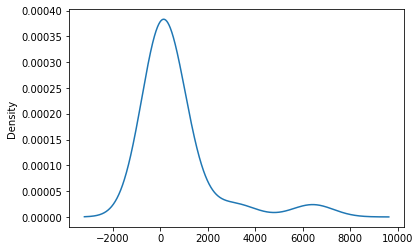

In [24]:
# lets check the distribution
df_random.bath.value_counts().plot.density();

# check the mean and median 
print(df_random.bath.agg(['mean','median']))

# fill the null values with median

df_random['bath'] = df_random['bath'].fillna(df_random.bath.median())

0.04793597971634577
mean      1.58472
median    2.00000
Name: balcony, dtype: float64


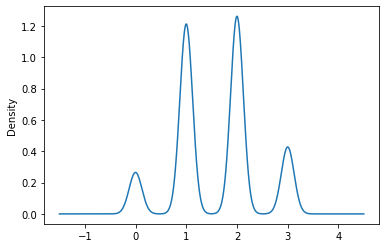

In [25]:
# 'balcony' missing imputation
print(df_random.balcony.isna().mean())

# mean and median of the balcony 
print(df_random.balcony.agg(['mean', 'median']))


df_random.balcony.plot.density();


df_random['balcony'] = df_random['balcony'].fillna(df_random.balcony.median())

nan values: 16
mean      2.826101
median    3.000000
Name: Bedrooms, dtype: float64


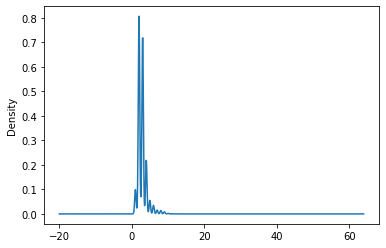

In [26]:
print("nan values:",df_random.Bedrooms.isna().sum())

# mean and median of the balcony 
print(df_random.Bedrooms.agg(['mean', 'median']))


# df_random.Bedrooms.astype(float)
df_random.Bedrooms.plot.density();


df_random['Bedrooms'] = df_random['Bedrooms'].fillna(df_random.Bedrooms.median())


In [27]:
df_random.isna().mean()

area_type       0.0
location        0.0
society         0.0
bath            0.0
balcony         0.0
Availability    0.0
Bedrooms        0.0
Toal_sqft       0.0
Price           0.0
dtype: float64

### Seperate the x and y variable


mean      118.289676
median     74.000000
Name: Price, dtype: float64


<AxesSubplot:xlabel='Price', ylabel='Density'>

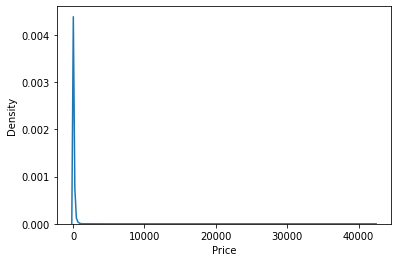

In [28]:
data_x = df_random.drop('Price',axis=1)
data_y = df_random['Price']

print(data_y.agg(['mean','median']))

sns.kdeplot(data_y)

In [29]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12621 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12621 non-null  object 
 1   location      12621 non-null  object 
 2   society       12621 non-null  object 
 3   bath          12621 non-null  float64
 4   balcony       12621 non-null  float64
 5   Availability  12621 non-null  object 
 6   Bedrooms      12621 non-null  float64
 7   Toal_sqft     12621 non-null  float64
dtypes: float64(4), object(4)
memory usage: 887.4+ KB


In [30]:
# seperate number and categorical data

num = data_x.select_dtypes('number')

cat = data_x.select_dtypes(exclude='number')

## Analysis on Num

#### Outliers Treatment

In [31]:
print("To check the Outliers in the dataset")
print(num.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999]))

def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

# capping and flooring of 0.1% ensures the minimal SD impact on the dataset
num=num.apply(lambda x : outlier_cap(x))  

# dataset after outlier Treatment
num.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

To check the Outliers in the dataset
               bath       balcony      Bedrooms     Toal_sqft
count  12621.000000  12621.000000  12621.000000  12621.000000
mean       2.713256      1.604627      2.826321   1567.755804
std        1.360563      0.809663      1.316219   1265.011045
min        1.000000      0.000000      1.000000      1.000000
0.1%       1.000000      0.000000      1.000000     20.580000
1%         1.000000      0.000000      1.000000    450.000000
10%        2.000000      1.000000      2.000000    883.000000
25%        2.000000      1.000000      2.000000   1100.000000
50%        2.000000      2.000000      3.000000   1282.000000
75%        3.000000      2.000000      3.000000   1693.000000
95%        5.000000      3.000000      5.000000   3300.000000
99%        8.000000      3.000000      8.000000   5000.000000
99.9%     12.000000      3.000000     10.000000  12000.000000
max       40.000000      3.000000     43.000000  52272.000000


,bath,balcony,Bedrooms,Toal_sqft
count,12621.000000,12621.000000,12621.000000,12621.000000
mean,2.696617,1.604627,2.811108,1529.394422
std,1.231241,0.809663,1.186950,800.252506
min,1.000000,0.000000,1.000000,450.000000
0.1%,1.000000,0.000000,1.000000,450.000000
1%,1.000000,0.000000,1.000000,450.000000
10%,2.000000,1.000000,2.000000,883.000000
25%,2.000000,1.000000,2.000000,1100.000000
50%,2.000000,2.000000,3.000000,1282.000000
75%,3.000000,2.000000,3.000000,1693.000000


## Feature Selection - Numerical Features 
## Part 1 : Remove Features with 0 Variance

In [32]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

### Part 2 - Bi Variate Analysis (Feature Discretization)

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

C:\Users\KIRAN Sonkamble\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\KIRAN Sonkamble\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\KIRAN Sonkamble\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(


,bath_Rank,balcony_Rank,Bedrooms_Rank,Toal_sqft_Rank
0,1.0,1.0,1.0,2.0
1,3.0,2.0,3.0,9.0
2,1.0,2.0,2.0,6.0
3,2.0,1.0,2.0,6.0
4,1.0,1.0,1.0,4.0


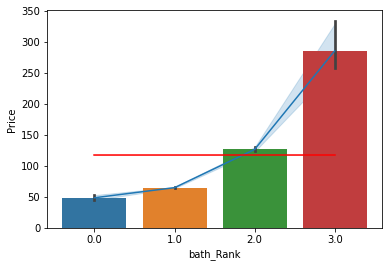

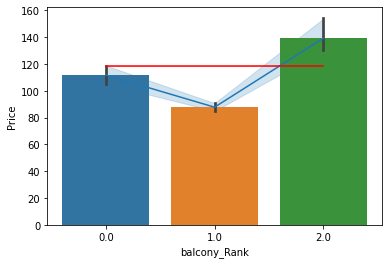

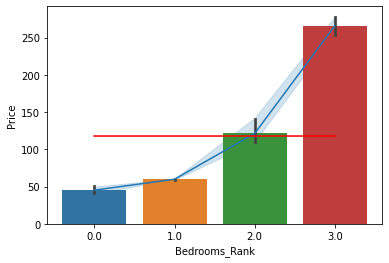

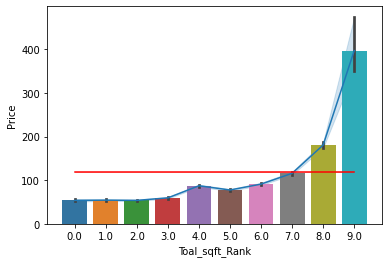

In [34]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([data_y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="Price",data=X_bin_combined, estimator=mean )
    sns.lineplot(x=col,data=X_bin_combined,y='Price')
    sns.lineplot(x=col,data=X_bin_combined,y=X_bin_combined['Price'].mean(),color='red')

plt.show()

In [35]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

# shape
num_1.shape


(12621, 4)

### Feature Selection- Categorical Features

In [36]:
cat

,area_type,location,society,Availability
0,Super built-up Area,Electronic City Phase II,Coomee,Dec
1,Plot Area,Chikka Tirupathi,Theanmp,available
2,Built-up Area,Uttarahalli,random address,available
3,Super built-up Area,Lingadheeranahalli,Soiewre,available
4,Super built-up Area,Kothanur,random address,available
...,...,...,...,...
13315,Built-up Area,Whitefield,ArsiaEx,available
13316,Super built-up Area,Richards Town,random address,available
13317,Built-up Area,Raja Rajeshwari Nagar,Mahla T,available
13318,Super built-up Area,Padmanabhanagar,SollyCl,Jun


#### create Bins from categorical data such as 'location' and  'society'

In [37]:
# get the all values from the value counts method
cat_area_type = cat.location.value_counts()

loc_21 = cat_area_type[cat_area_type<11]
loc_100 = cat_area_type[cat_area_type<39]
loc_159 = cat_area_type[cat_area_type<99]
loc_200 = cat_area_type[cat_area_type<159]


def locations_bin(x):
    if x in loc_21:
        return 'locaction_1'
    elif x in loc_100:
        return 'location_2'
    elif x in loc_159:
        return 'location_3'
    elif x in loc_200:
        return 'location_4'
    else:
        return 'location_5'
    
    return x

cat['location'] = cat['location'].apply(locations_bin)

cat.location.value_counts()

location_3     3343
location_2     3126
locaction_1    2957
location_5     1977
location_4     1218
Name: location, dtype: int64

In [38]:
society_values = cat.society.value_counts()

society_19 = society_values[society_values<9]
society_39 = society_values[society_values<21]
society_49 = society_values[society_values<68]

def society_bin(x):

    if x in society_19:
        return 'society_1'
    elif x in society_39:
        return 'society_2'
    elif x in society_49:
        return 'society_3'
    else:
        return 'society_4'
    
    return x
    
cat['society'] = cat['society'].apply(society_bin)

In [39]:
cat

,area_type,location,society,Availability
0,Super built-up Area,location_4,society_1,Dec
1,Plot Area,location_2,society_2,available
2,Built-up Area,location_4,society_4,available
3,Super built-up Area,location_2,society_3,available
4,Super built-up Area,location_3,society_4,available
...,...,...,...,...
13315,Built-up Area,location_5,society_1,available
13316,Super built-up Area,locaction_1,society_4,available
13317,Built-up Area,location_4,society_1,available
13318,Super built-up Area,location_2,society_1,Jun


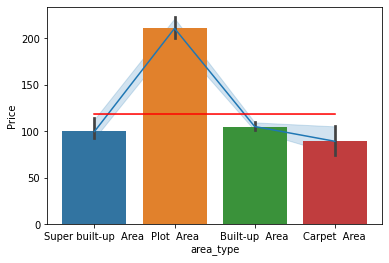

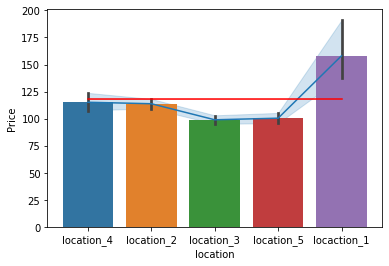

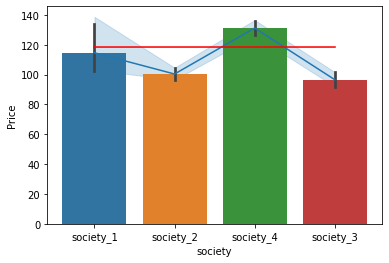

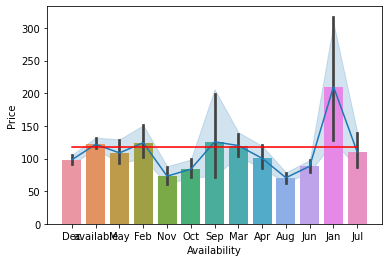

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([data_y,cat],axis=1,join='inner')

from numpy import mean
for col in (cat.columns):
    plt.figure()
    sns.barplot(x=col, y="Price",data=X_char_merged, estimator=mean )
    sns.lineplot(x=col,data=X_char_merged,y='Price')
    sns.lineplot(x=col,data=X_char_merged,y=X_char_merged['Price'].mean(),color='red')

plt.show()

### All features from cat will get selected due to good discrimination


In [41]:
# selected variables are in 'cat_all'
cat_all = X_char_merged

# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(cat_all, drop_first = True,)
X_char_dum.shape

(12621, 23)

### Select K best

In [42]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=17)
selector.fit_transform(X_char_dum, data_y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [43]:
select_features_df_char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12621 entries, 0 to 13319
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           12621 non-null  float64
 1   area_type_Plot  Area            12621 non-null  uint8  
 2   area_type_Super built-up  Area  12621 non-null  uint8  
 3   location_location_4             12621 non-null  uint8  
 4   location_location_5             12621 non-null  uint8  
 5   society_society_2               12621 non-null  uint8  
 6   society_society_3               12621 non-null  uint8  
 7   society_society_4               12621 non-null  uint8  
 8   Availability_Aug                12621 non-null  uint8  
 9   Availability_Dec                12621 non-null  uint8  
 10  Availability_Feb                12621 non-null  uint8  
 11  Availability_Jan                12621 non-null  uint8  
 12  Availability_Jul                

## Master Dataset

In [44]:
# combine the "num" and "cat" data into 'X'
X_all = pd.concat([select_features_df_num,select_features_df_char],axis=1, join='inner')

# see the view
X_all

,bath,balcony,Bedrooms,Toal_sqft,Price,area_type_Plot Area,area_type_Super built-up Area,location_location_4,location_location_5,society_society_2,...,society_society_4,Availability_Aug,Availability_Dec,Availability_Feb,Availability_Jan,Availability_Jul,Availability_Jun,Availability_Mar,Availability_May,Availability_Sep
0,2.0,1.0,2.0,1056.0,39.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,3.0,4.0,2600.0,120.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,3.0,1440.0,62.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,1.0,3.0,1521.0,95.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,2.0,1200.0,51.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,5.0,3453.0,231.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13316,5.0,2.0,4.0,3600.0,400.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,2.0,1141.0,60.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,4.0,4689.0,488.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
# seperate x and y
X = X_all.drop(['Price'],axis=1)

Y = X_all['Price']

# rate of Price
print(Y.mean())

118.28967593693051


### Train Test Split 

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=89)

In [47]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (8834, 20)
Shape of Testing Data (3787, 20)
Response Rate in Training Data 118.89008376726285
Response Rate in Testing Data 116.88909426987061


# Let's start modeling with Linear Regression 

In [48]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# train the model
linear_model.fit(X_train,y_train)

# vlidate the model
linear_predict = linear_model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score, accuracy_score,mean_absolute_error,mean_squared_error

# check the performance of the Linear Regrssin model

r2_score(y_test,linear_predict)

0.4669253227431216

In [51]:
X

,bath,balcony,Bedrooms,Toal_sqft,area_type_Plot Area,area_type_Super built-up Area,location_location_4,location_location_5,society_society_2,society_society_3,society_society_4,Availability_Aug,Availability_Dec,Availability_Feb,Availability_Jan,Availability_Jul,Availability_Jun,Availability_Mar,Availability_May,Availability_Sep
0,2.0,1.0,2.0,1056.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,3.0,4.0,2600.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,3.0,1440.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.0,1.0,3.0,1521.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,2.0,1200.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,5.0,3453.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13316,5.0,2.0,4.0,3600.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,2.0,1141.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,4.0,4689.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
